<a href="https://colab.research.google.com/github/charleanems/dry_beans_analysis/blob/main/dry_beans_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing required libraries
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn.preprocessing as preproc
import plotly.express as px

In [ ]:
# reading dataset
df = pd.read_excel('Dry_Bean_Dataset.xlsx')

## Data Understanding

It is explored the dataset to comprehend the general characteristics of the dataset.

The dataset contains:
- 13.611 observations;
- 17 dimensions: 16 independent variables (numeric) and 1 dependent variable (categorical);
- There is no null values.

In [ ]:
# getting details
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [ ]:
# 5 first rows
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

The independent variables (attributes) point out the differents unit of measurement of beans, such as: Area, Perimeter, MajorAxisLength, MinorAxisLength, AspectRation, Eccentricity, ConvexArea, EquivDiameter, Extent, Solidity, Roundness, Compactness, etc.

While the dependent variable (reponse) correspond to the classification of seven types of dry beans: Barbunya, Bombay, Cali, Dermason, Horoz, Seker and Sira.

It is used describe method to display to analyse the frequency of the dry beans. It is seen that the type Dermason occurs more often, followed by Sira, Seker, etc. In addiction it is also used the groupby an countplot methods to visualize all type of beans and their corresponding frequency.

In [ ]:
# getting most frequency of the class feature
df.describe(include=object)

Class
count      13611
unique         7
top     DERMASON
freq        3546

In [ ]:
# displaying feature class too see its frequency
print(df.groupby('Class').size())

Class
BARBUNYA    1322
BOMBAY       522
CALI        1630
DERMASON    3546
HOROZ       1928
SEKER       2027
SIRA        2636
dtype: int64


<AxesSubplot:xlabel='count', ylabel='Class'>

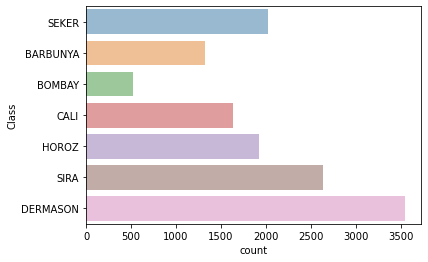

In [ ]:
# plotting feature class too see its frequency
sns.countplot(y='Class', alpha=0.5, data=df)

### Visualisation of the data

It is noticed all numeric variables are greater than zero, in this way their skewness is right skewed. In addiction, most of features are spread normal distribution graphilly.

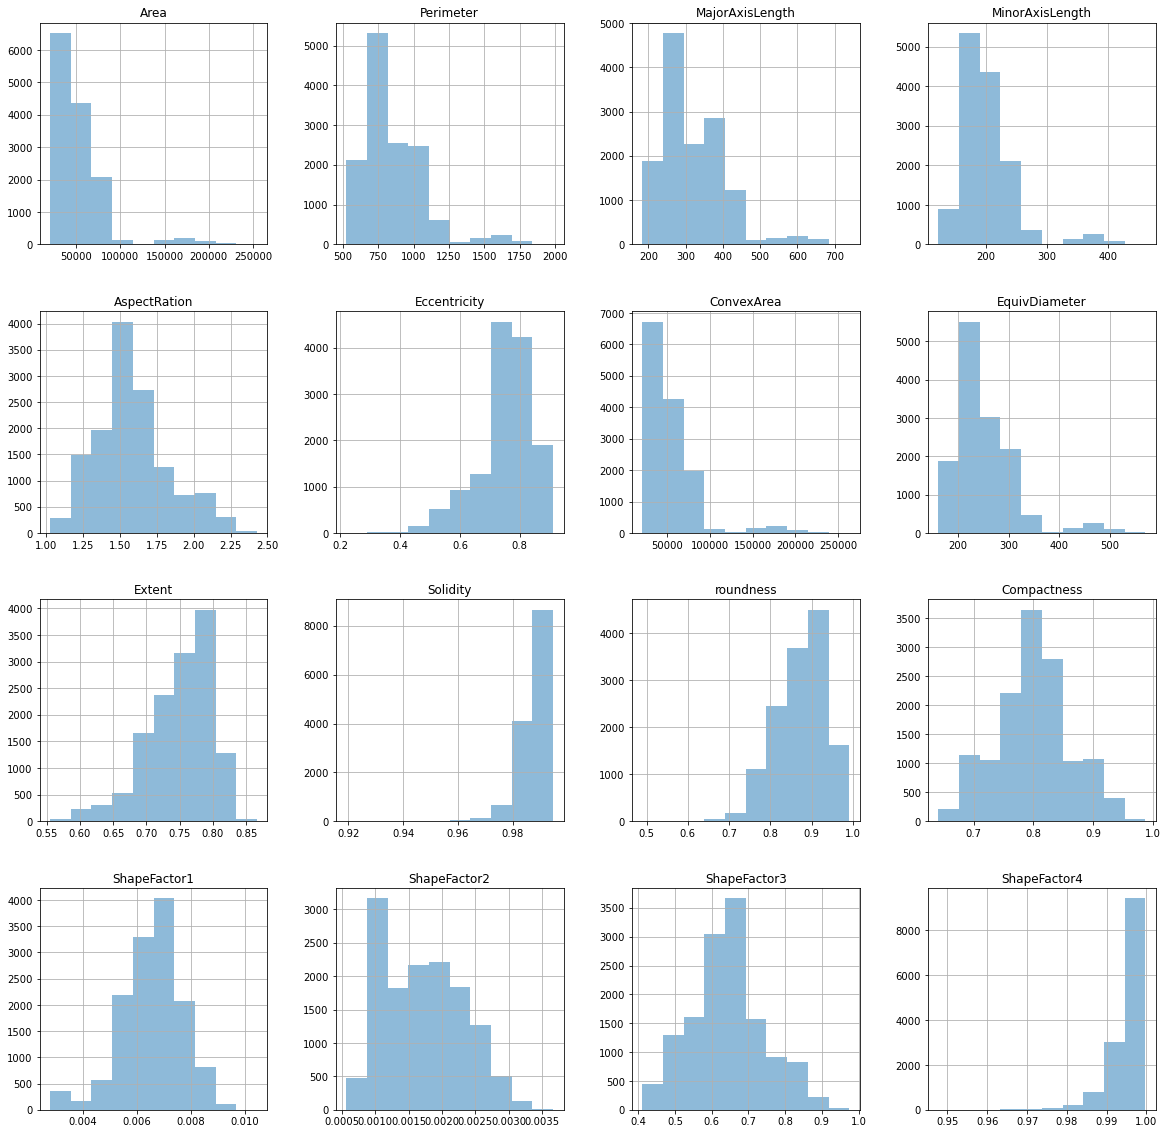

In [ ]:
# plotting all numeric variables
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df.hist(ax = ax, alpha=0.5)
plt.show()

A chart to visualise the correlation between 3 features also was created, it illustrates an enormous interaction between all types of dry beans, except for Bombay.

In [ ]:
# plotting correlation 3-D
fig = px.scatter_3d(df, x='Area', y='ConvexArea', z='Extent',
              color='Class')
fig.show()

To visualising all features was created a matrix plot, which shows that Area, Perimeter, MajorAxisLength, MinorAxisLength, ConvexArea, and EquivDiameter features are highly correlated with each other, meaning a strong impact to classify the dry beans.

While the Extent, Solidity, Roundness, Compactness, ShapeFactor1, ShapeFactor2, ShapeFactor3 and ShapeFactor4 features have a fluctuating correlation, varying between low/medium correlation, showing that there is no significant impact to classify dry beans.

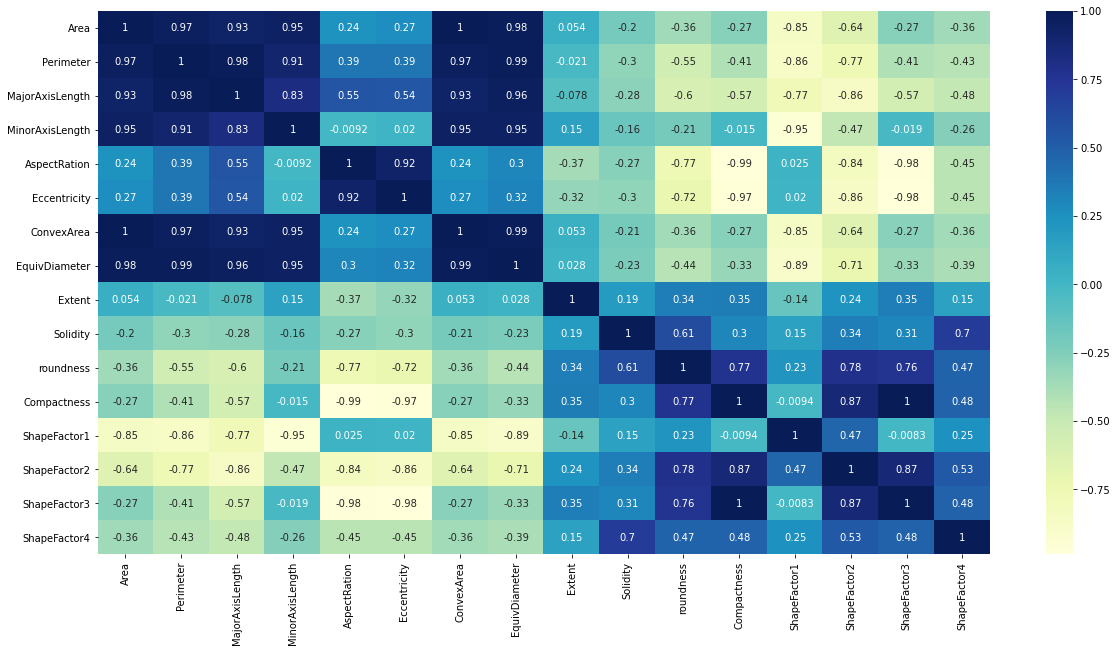

In [ ]:
# plotting correlations of all features
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

## Data Cleaning

The dataset is adjusted and organized.

### Irrelevant data and Syntax errors

As all numeric variables are unit of measurement of the beans and the categorical variable allocates each type of the beans, that is mean that there is no irrelante data. Besides It is detected that the dataset has no misspelling.

In [ ]:
# displaying all columns
df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

### Type conversion

It is checked by dtypes method that the dataset has no incorrect data type.

In [ ]:
df.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

### Duplicates

it is recognized that dataset has 68 duplicate rows (0.05%), in this way the drop_duplicates method is used to remove them.

In [ ]:
# displaying duplicate rows based on all columns
duplicates = df[df.duplicated()]
print(duplicates)

       Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
5505  33518    702.956       277.571399       154.305581      1.798842   
5509  33954    716.750       277.368480       156.356326      1.773951   
5548  38427    756.323       306.533886       160.591784      1.908777   
5554  38891    791.343       319.499996       156.869619      2.036723   
5599  40804    790.802       323.475648       163.287717      1.981016   
...     ...        ...              ...              ...           ...   
7263  63408   1005.966       412.551649       196.337705      2.101235   
7278  63882   1004.206       411.263403       198.765453      2.069089   
7285  63948    996.497       412.297178       198.877557      2.073121   
7340  65766   1035.842       406.416622       207.242369      1.961069   
7342  65781   1039.257       409.713859       204.992832      1.998674   

      Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
5505      0.831240       34023 

In [ ]:
# counting rows before the drop
df.count()

Area               13611
Perimeter          13611
MajorAxisLength    13611
MinorAxisLength    13611
AspectRation       13611
Eccentricity       13611
ConvexArea         13611
EquivDiameter      13611
Extent             13611
Solidity           13611
roundness          13611
Compactness        13611
ShapeFactor1       13611
ShapeFactor2       13611
ShapeFactor3       13611
ShapeFactor4       13611
Class              13611
dtype: int64

In [ ]:
# dropping duplicate values
df = df.drop_duplicates()

In [ ]:
# counting rows after the drop
df.count()

Area               13543
Perimeter          13543
MajorAxisLength    13543
MinorAxisLength    13543
AspectRation       13543
Eccentricity       13543
ConvexArea         13543
EquivDiameter      13543
Extent             13543
Solidity           13543
roundness          13543
Compactness        13543
ShapeFactor1       13543
ShapeFactor2       13543
ShapeFactor3       13543
ShapeFactor4       13543
Class              13543
dtype: int64

### Missing values

It is showed by isnull method that the dataset has no missing values (also by info method above).

In [ ]:
# checking missing values
print(df.isnull().sum())

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


### Outliers

The plotbox bellow shows that Area and ConvexArea features present huge distant values, however as it is known that all variables were crucial to identify the beans concluding that the dataset has no outiliers. 

However, those variables must be standardized, a process will be executed in Data Preparation.

<AxesSubplot:>

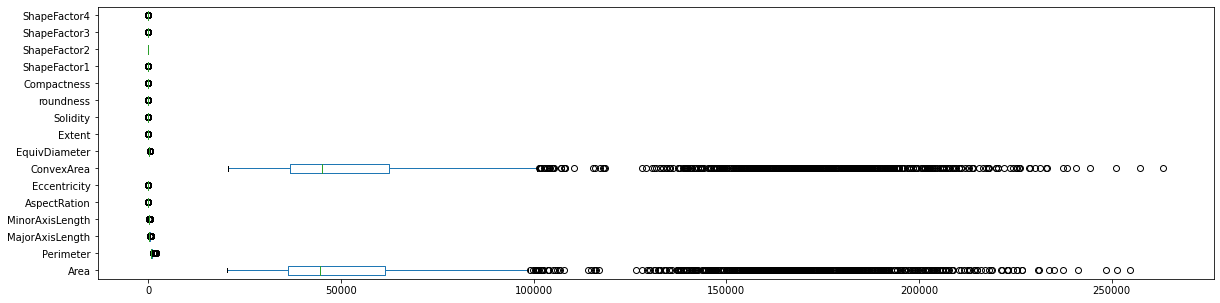

In [ ]:
# plotting box to visualing outiliers
df.plot(kind='box', vert=False, figsize=(20, 5))

## Data Preparation

It is prepared the dataset before to apply ML techniques.

### Standardization

It is realised a huge distance by a simple comparation between minimum values and maximum values (also by plotbox above), in this way it was genetered a 'minmax' variable to store a standardization of the numeric variables through 'preproc.minmax_scale' method - scaling the values between 0 and 1, thus the performance of the accuraries will not be harmful when ML models are applied posteriorly.

In [ ]:
# calculating the central of tendency to check min and max values
df.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13543.000000  13543.000000     13543.000000     13543.000000   
mean    53048.460385    854.993406       319.895602       202.365321   
std     29392.438324    214.722684        85.809260        45.051632   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36282.500000    703.230000       253.086806       175.886357   
50%     44580.000000    793.896000       296.404589       192.491117   
75%     61382.000000    977.146500       376.312489       217.245403   
max    254616.000000   1985.370000       738.860153       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13543.000000  13543.000000   13543.000000   13543.000000  13543.000000   
mean       1.581075      0.750315   53767.986709     253.034094      0.749829   
std        0.245245      0.091858   29844.248525      59.307709      0.048939   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.430662      0.715144   36673.000000     214.933277      0.718735   
50%        1.549860      0.763997   45122.000000     238.245711      0.759903   
75%        1.703916      0.809671   62360.000000     279.560351      0.786849   
max        2.430306      0.911423  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  13543.000000  13543.000000  13543.000000  13543.000000  13543.000000   
mean       0.987152      0.873671      0.800352      0.006561      0.001719   
std        0.004650      0.059393      0.061464      0.001130      0.000595   
min        0.919246      0.489618      0.640577      0.002778      0.000564   
25%        0.985678      0.833410      0.763228      0.005893      0.001158   
50%        0.988288      0.883490      0.801514      0.006643      0.001700   
75%        0.990019      0.917031      0.834470      0.007270      0.002173   
max        0.994677      0.990685      0.987303      0.010451      0.003665   

       ShapeFactor3  ShapeFactor4  
count  13543.000000  13543.000000  
mean       0.644341      0.995078  
std        0.098653      0.004347  
min        0.410339      0.947687  
25%        0.582517      0.993720  
50%        0.642424      0.996393  
75%        0.696341      0.997891  
max        0.974767      0.999733

In [ ]:
# standardizing numeric values and storing in a variable
minmax = preproc.minmax_scale(df[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']])
print(minmax)

[[0.03405267 0.05857388 0.04426214 ... 0.83304879 0.75099637 0.98061988]
 [0.03550018 0.07755673 0.03047881 ... 0.96731548 0.88498696 0.97497943]
 [0.03825855 0.06803484 0.05263303 ... 0.80094229 0.7361995  0.98719587]
 ...
 [0.09273856 0.16060492 0.17638393 ... 0.42701895 0.4722397  0.9430251 ]
 [0.09277272 0.16365701 0.17970258 ... 0.41532999 0.45691893 0.91334231]
 [0.09282396 0.16944765 0.20088207 ... 0.34689166 0.36476185 0.9701623 ]]


### Feature Engineering

It is added a column which identifies the Class feature numerically to be applied on machine learning models that do not accept categorical variables.

In [ ]:
# adding a column 'Type' to classify the Class feature
df.loc[df.Class == 'SEKER', 'Type'] = 0
df.loc[df.Class == 'BARBUNYA', 'Type'] = 1
df.loc[df.Class == 'BOMBAY', 'Type'] = 2
df.loc[df.Class == 'CALI', 'Type'] = 3
df.loc[df.Class == 'DERMASON', 'Type'] = 4
df.loc[df.Class == 'HOROZ', 'Type'] = 5
df.loc[df.Class == 'SIRA', 'Type'] = 6

In [ ]:
# displaying the values of the 'Type' column
df.Type.unique()

array([0., 1., 2., 3., 5., 6., 4.])

In [ ]:
df.Type

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
13606    4.0
13607    4.0
13608    4.0
13609    4.0
13610    4.0
Name: Type, Length: 13543, dtype: float64

### Splitting the dataset

In [ ]:
# defining X and Y
feature_X = minmax
feature_y = ['Class']
X = feature_X
y = df[feature_y]
print(X, y)

[[0.03405267 0.05857388 0.04426214 ... 0.83304879 0.75099637 0.98061988]
 [0.03550018 0.07755673 0.03047881 ... 0.96731548 0.88498696 0.97497943]
 [0.03825855 0.06803484 0.05263303 ... 0.80094229 0.7361995  0.98719587]
 ...
 [0.09273856 0.16060492 0.17638393 ... 0.42701895 0.4722397  0.9430251 ]
 [0.09277272 0.16365701 0.17970258 ... 0.41532999 0.45691893 0.91334231]
 [0.09282396 0.16944765 0.20088207 ... 0.34689166 0.36476185 0.9701623 ]]           Class
0         SEKER
1         SEKER
2         SEKER
3         SEKER
4         SEKER
...         ...
13606  DERMASON
13607  DERMASON
13608  DERMASON
13609  DERMASON
13610  DERMASON

[13543 rows x 1 columns]


# 5. Machine Learning Models

## K-Nearest Neighbors

In [ ]:
# defining train and test 10%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [ ]:
# displaying train shape
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (12188, 16)
y_train shape: (12188, 1)


In [ ]:
# displaying train shape
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (1355, 16)
y_test shape: (1355, 1)


In [ ]:
# splitting train and test 20%
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# X_train shape: (10834, 16), y_train shape: (10834, 1), X_test shape: (2709, 16), y_test shape: (2709, 1)
# accuracy: 0.92
# cv: 0.88

In [ ]:
# splitting train and test 10%
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# X_train shape: (9480, 16), y_train shape: (9480, 1), X_test shape: (4063, 16), y_test shape: (4063, 1)
# accuracy: 0.92
# cv: 0.88

### Finding the best number of neighbors (k)

In [ ]:
# ranging 1-15 neighbors
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1,15)
train_accuracy = np.zeros(len(neighbors))
test_accuracy = np.zeros(len(neighbors))

In [ ]:
# fitting data and computing accuracy of the training and test set
for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

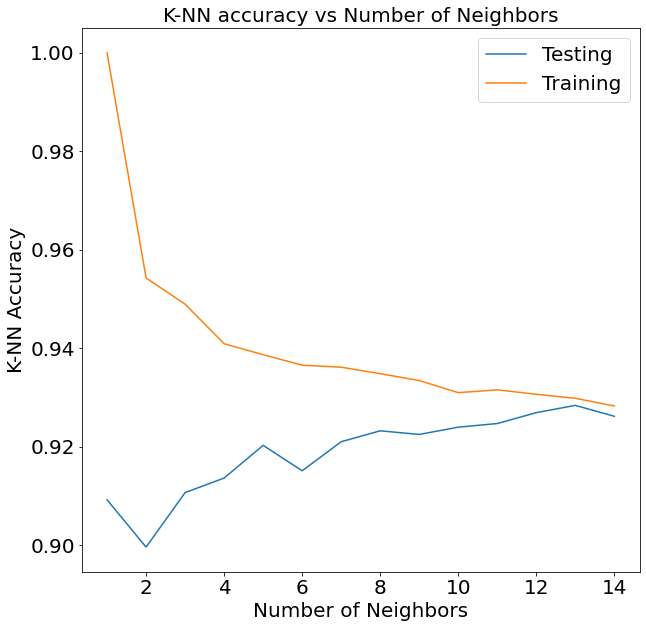

In [ ]:
# plotting a graph to visualise the best neighbor value
plt.figure(figsize = (10,10))
plt.title('K-NN accuracy vs Number of Neighbors', fontsize=20)
plt.plot(neighbors, test_accuracy, label='Testing')
plt.plot(neighbors, train_accuracy, label='Training')
plt.legend(prop={'size': 20})
plt.xlabel('Number of Neighbors', fontsize=20)
plt.ylabel('K-NN Accuracy', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [ ]:
# fitting a model with the chosen parameter: 12 neighbors
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)
train_accuracy = knn.score(X_train, y_train)
test_accuracy = knn.score(X_test, y_test)

In [ ]:
# evaluating the model
print("Train set accuracy: {:.2f}".format(train_accuracy))
print("Test set accuracy: {:.2f}".format(test_accuracy))

Train set accuracy: 0.93
Test set accuracy: 0.93


In [ ]:
# predicting the model
y_pred = knn.predict(X_test)
print(y_pred)

['DERMASON' 'SIRA' 'CALI' ... 'HOROZ' 'SEKER' 'CALI']


In [ ]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.98      0.90      0.94       131
      BOMBAY       1.00      1.00      1.00        46
        CALI       0.94      0.98      0.96       179
    DERMASON       0.91      0.93      0.92       363
       HOROZ       0.98      0.93      0.96       184
       SEKER       0.93      0.96      0.95       200
        SIRA       0.86      0.85      0.86       252

    accuracy                           0.93      1355
   macro avg       0.94      0.94      0.94      1355
weighted avg       0.93      0.93      0.93      1355



In [ ]:
# displaying confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm, cm.shape)

[[118   0   8   0   1   1   3]
 [  0  46   0   0   0   0   0]
 [  1   0 175   0   1   1   1]
 [  0   0   0 338   0   7  18]
 [  1   0   3   3 172   0   5]
 [  0   0   0   1   0 192   7]
 [  1   0   0  29   2   5 215]] (7, 7)


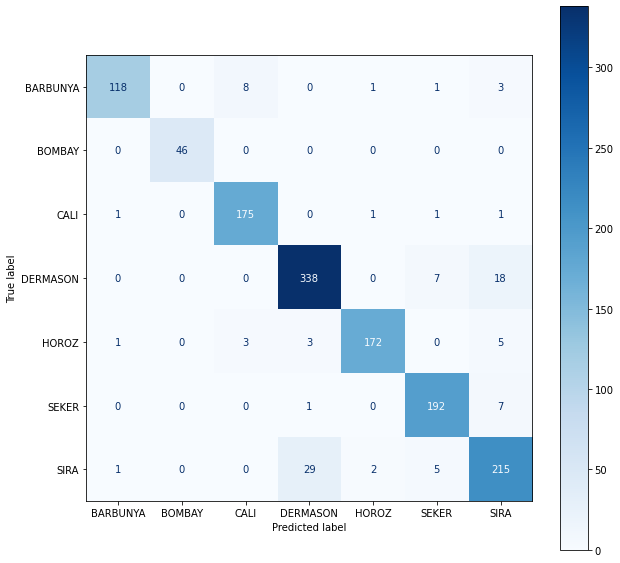

In [ ]:
# visualising confusion matrix
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(knn, X_test, y_test, include_values=True, ax=ax, cmap=plt.cm.Blues)
plt.show()

In [ ]:
# k-NN cross validation
from sklearn.model_selection import cross_val_score
cross_score = cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()
print("Accurary of Cross Validation: {:.2f}".format(cross_score))

Accurary of Cross Validation: 0.88


## Decision Tree

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

In [ ]:
# reading dataset
df = pd.read_excel('Dry_Bean_Dataset.xlsx')

In [ ]:
import sklearn.preprocessing as preproc
minmax = preproc.minmax_scale(df[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']])
print(minmax)

[[0.03405267 0.05857388 0.04426214 ... 0.83304879 0.75099637 0.98061988]
 [0.03550018 0.07755673 0.03047881 ... 0.96731548 0.88498696 0.97497943]
 [0.03825855 0.06803484 0.05263303 ... 0.80094229 0.7361995  0.98719587]
 ...
 [0.09273856 0.16060492 0.17638393 ... 0.42701895 0.4722397  0.9430251 ]
 [0.09277272 0.16365701 0.17970258 ... 0.41532999 0.45691893 0.91334231]
 [0.09282396 0.16944765 0.20088207 ... 0.34689166 0.36476185 0.9701623 ]]


In [ ]:
feature_X = minmax
feature_y = ['Class']
X = feature_X
y = df[feature_y]

In [ ]:
# split Train and Test 10%
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class',axis=1),df['Class'],test_size=0.1)
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((12249, 16), (1362, 16), (12249,), (1362,))

In [ ]:
# split Train and Test 20%
#X_train, X_test, y_train, y_test = train_test_split(df.drop('Class',axis=1),df['Class'],test_size=0.2)
#((10834, 16), (2709, 16), (10834,), (2709,))
#accuracy 0.89

In [ ]:
# split Train and Test 30%
#X_train, X_test, y_train, y_test = train_test_split(df.drop('Class',axis=1),df['Class'],test_size=0.3)
#((9480, 16), (4063, 16), (9480,), (4063,))
#accuracy 0.89

### Building Decision Tree Model

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
clf = clf.fit(X_train,y_train)

In [ ]:
result = clf.predict(X_test)
result

array(['BARBUNYA', 'DERMASON', 'SIRA', ..., 'SEKER', 'HOROZ', 'SIRA'],
      dtype=object)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,result))

              precision    recall  f1-score   support

    BARBUNYA       0.88      0.89      0.89       136
      BOMBAY       1.00      1.00      1.00        64
        CALI       0.93      0.89      0.91       173
    DERMASON       0.88      0.85      0.86       348
       HOROZ       0.95      0.96      0.95       180
       SEKER       0.92      0.92      0.92       199
        SIRA       0.77      0.82      0.79       262

    accuracy                           0.88      1362
   macro avg       0.90      0.90      0.90      1362
weighted avg       0.89      0.88      0.88      1362



In [ ]:
!pip install ipywidgets
!pip3 install graphviz
!pip3 install pydot
import pydot
import graphviz

In [ ]:
from ipywidgets import interactive
from IPython.display import SVG,display
from graphviz import Source

# feature matrix
X,y = df.drop('Class',axis=1),df['Class']

# feature labels
features_label = df.drop('Class',axis=1).columns

# class label
class_label = ['DERMASON','SIRA','SEKER','HOROZ ','CALI','BARBUNYA','BOMBAY']


def plot_tree(crit, split, depth, min_samples_split, min_samples_leaf=0.2):
    estimator = DecisionTreeClassifier(
           random_state = 0 
          ,criterion = crit
          ,splitter = split
          ,max_depth = depth
          ,min_samples_split=min_samples_split
          ,min_samples_leaf=min_samples_leaf
    )
    estimator.fit(X, y)
    graph = Source(export_graphviz(estimator
      , out_file=None
      , feature_names=features_label
      , class_names=class_label
      , impurity=True
      , filled = True))
    display(SVG(graph.pipe(format='svg')))
    return estimator

inter=interactive(plot_tree 
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=[1,2,3,4,5,10,20,30]
   , min_samples_split=(1,5)
   , min_samples_leaf=(1,5))

display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

In [ ]:
estimator = DecisionTreeClassifier(max_depth=4,min_samples_split=2,min_samples_leaf=2)
estimator.fit(X, y)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2)

In [ ]:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold

print("Number of nodes: {}".format(n_nodes))

Number of nodes: 31


In [ ]:
from sklearn.model_selection import cross_val_score
cross_score = cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean()
print("Accurary of Cross Validation: {:.2f}".format(cross_score))

Accurary of Cross Validation: 0.69


In [ ]:
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("\nThe decision tree has %s nodes and the follow sctruture: \n"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snodes=%s (nodel leaf)." % (node_depth[i] * "\t", i))
    else:
        print("%snodes=%s (node test): go to the node %s if the atribute value %s <= %s \n if not, go to the node "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 df.columns[feature[i]],
                 threshold[i],
                 children_right[i],
                 ))


The decision tree has 31 nodes and the follow sctruture: 

nodes=0 (node test): go to the node 1 if the atribute value MajorAxisLength <= 280.7041931152344 
 if not, go to the node node 16.
	nodes=1 (node test): go to the node 2 if the atribute value ShapeFactor1 <= 0.006819602334871888 
 if not, go to the node node 9.
		nodes=2 (node test): go to the node 3 if the atribute value ShapeFactor3 <= 0.7274537682533264 
 if not, go to the node node 6.
			nodes=3 (node test): go to the node 4 if the atribute value roundness <= 0.9265730679035187 
 if not, go to the node node 5.
				nodes=4 (nodel leaf).
				nodes=5 (nodel leaf).
			nodes=6 (node test): go to the node 7 if the atribute value Compactness <= 0.8695324659347534 
 if not, go to the node node 8.
				nodes=7 (nodel leaf).
				nodes=8 (nodel leaf).
		nodes=9 (node test): go to the node 10 if the atribute value Perimeter <= 711.3135070800781 
 if not, go to the node node 13.
			nodes=10 (node test): go to the node 11 if the atribute

## Random Forest

In [ ]:
# defining train and test 10%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# displaying train shape
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (9527, 16)
y_train shape: (9527,)


In [ ]:
# displaying test shape
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (4084, 16)
y_test shape: (4084,)


In [ ]:
# splitting train and test 20%
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# X_train shape: (10834, 16), y_train shape: (10834, 1), X_test shape: (2709, 16), y_test shape: (2709, 1)
# accuracy: 0.92
# cv: 0.73

In [ ]:
# splitting train and test 30%
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# X_train shape: (9480, 16), y_train shape: (9480, 1), X_test shape: (4063, 16), y_test shape: (4063, 1)
# accuracy: 0.92
# cv: 0.73

In [ ]:
# importing Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# creating a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)

# training the model
train = clf.fit(X_train, y_train)

# predicting the model
y_pred = clf.predict(X_test)
print(y_pred)

['DERMASON' 'DERMASON' 'DERMASON' ... 'SEKER' 'SIRA' 'DERMASON']


In [ ]:
# calculating accuracy
print("Train set of Accuracy: {:.2f}".format(train.score(X_train, y_train)))
print("Test set of Accuracy: {:.2f}".format(train.score(X_test, y_test)))

Train set of Accuracy: 1.00
Test set of Accuracy: 0.93


In [ ]:
# Random Forest classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.94      0.89      0.92       389
      BOMBAY       1.00      1.00      1.00       134
        CALI       0.92      0.94      0.93       501
    DERMASON       0.91      0.94      0.93      1057
       HOROZ       0.96      0.95      0.95       594
       SEKER       0.95      0.96      0.95       579
        SIRA       0.89      0.87      0.88       830

    accuracy                           0.93      4084
   macro avg       0.94      0.93      0.94      4084
weighted avg       0.93      0.93      0.93      4084



In [ ]:
# displaying confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm, cm.shape)

[[348   0  25   0   2   4  10]
 [  0 134   0   0   0   0   0]
 [ 17   0 469   0  10   2   3]
 [  0   0   0 994   1  16  46]
 [  1   0  12   3 562   0  16]
 [  1   0   0   7   0 554  17]
 [  2   0   3  86  13   8 718]] (7, 7)


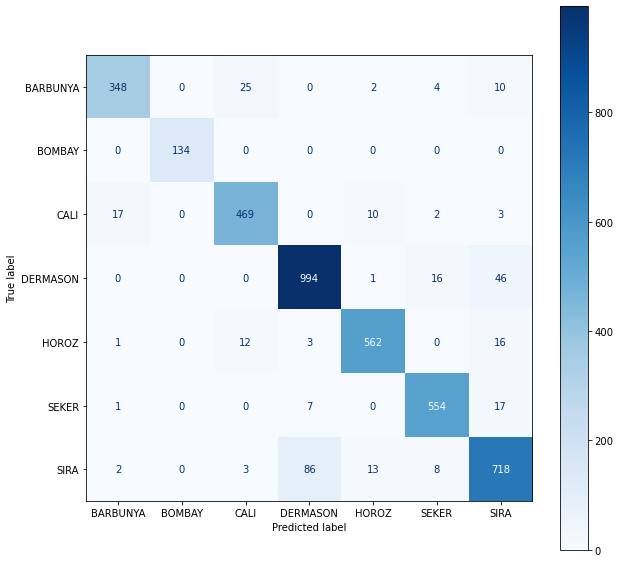

In [ ]:
# visualising confusion matrix
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(train, X_test, y_test, include_values=True, ax=ax, cmap=plt.cm.Blues)
plt.show()

In [ ]:
# Random Forest cross validation
from sklearn.model_selection import cross_val_score
cross_score = cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean()
print("Accurary of Cross Validation: {:.2f}".format(cross_score))

Accurary of Cross Validation: 0.72


## SVM - Support Vector Machine

### Training / Testing dataset


In [ ]:
#import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC

In [ ]:
feature_X = minmax
feature_y = ['Class']
X = feature_X
y = df[feature_y]

In [ ]:
# split Train and Test 20%
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)
# ((10834, 16), (2709, 16), (10834, 1), (2709, 1))
# accuracy 0.93 

In [ ]:
# split Train and Test 30%
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
# ((9480, 16), (4063, 16), (9480, 1), (4063, 1))
# accuracy 0.93      

In [ ]:
# split Train and Test 10%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12249, 16), (1362, 16), (12249, 1), (1362, 1))

### Applying SVM model

In [ ]:
# Support Vector Classification model
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [ ]:
# evaluating the model
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svc_model.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svc_model.score(X_test, y_test)))


Accuracy of SVM classifier on training set: 0.93
Accuracy of SVM classifier on test set: 0.92


### Model Evaluation

              precision    recall  f1-score   support

    BARBUNYA       0.95      0.91      0.93       135
      BOMBAY       0.98      1.00      0.99        56
        CALI       0.89      0.95      0.92       133
    DERMASON       0.92      0.93      0.93       368
       HOROZ       0.96      0.92      0.94       202
       SEKER       0.96      0.93      0.94       208
        SIRA       0.84      0.85      0.84       260

    accuracy                           0.92      1362
   macro avg       0.93      0.93      0.93      1362
weighted avg       0.92      0.92      0.92      1362



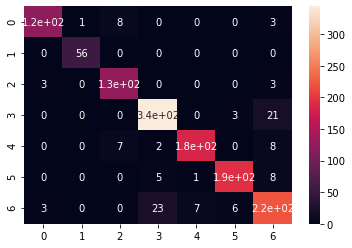

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict))

### hyper parameters

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.919, total=   1.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.917, total=   1.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.916, total=   1.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.9s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.906, total=   1.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.917, total=   1.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.895, total=   3.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.896, total=   3.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.888, total=   3.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.874, total=   3.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.883, total=   3.3s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  4.6min finished


              precision    recall  f1-score   support

    BARBUNYA       0.95      0.93      0.94       135
      BOMBAY       0.98      1.00      0.99        56
        CALI       0.89      0.95      0.92       133
    DERMASON       0.91      0.95      0.93       368
       HOROZ       0.96      0.90      0.93       202
       SEKER       0.97      0.95      0.96       208
        SIRA       0.87      0.87      0.87       260

    accuracy                           0.92      1362
   macro avg       0.93      0.93      0.93      1362
weighted avg       0.93      0.92      0.92      1362



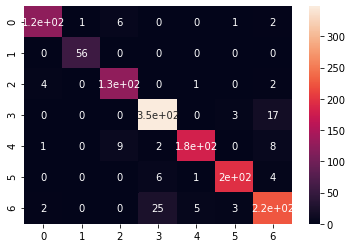

In [ ]:
#find best hyper parameters
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.001], 'kernel':['rbf']}
grid = GridSearchCV(SVC(),param_grid,verbose = 4)
grid.fit(X_train, y_train)
grid.best_params_
grid.best_estimator_
grid_predictions = grid.predict(X_test)
cmG = confusion_matrix(y_test,grid_predictions)
sns.heatmap(cmG, annot=True)
print(classification_report(y_test,grid_predictions))

In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
cross_score = cross_val_score(svc_model, feature_X, df[feature_y], cv=10, scoring='accuracy').mean()
print("Accurary of Cross Validation: {:.2f}".format(cross_score))

Accurary of Cross Validation: 0.90


## Linear Regression

### Training / Testing dataset

In [ ]:
# importing models from scikit learn module:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# adding a column 'Type' to classify the Class feature
df.loc[df.Class == 'SEKER', 'Type'] = 0
df.loc[df.Class == 'BARBUNYA', 'Type'] = 1
df.loc[df.Class == 'BOMBAY', 'Type'] = 2
df.loc[df.Class == 'CALI', 'Type'] = 3
df.loc[df.Class == 'DERMASON', 'Type'] = 4
df.loc[df.Class == 'HOROZ', 'Type'] = 5
df.loc[df.Class == 'SIRA', 'Type'] = 6

In [ ]:
# defining X and Y
feature_X = minmax
feature_y = ['Type']
X = feature_X
y = df[feature_y]

print(X, y)

[[0.03405267 0.05857388 0.04426214 ... 0.83304879 0.75099637 0.98061988]
 [0.03550018 0.07755673 0.03047881 ... 0.96731548 0.88498696 0.97497943]
 [0.03825855 0.06803484 0.05263303 ... 0.80094229 0.7361995  0.98719587]
 ...
 [0.09273856 0.16060492 0.17638393 ... 0.42701895 0.4722397  0.9430251 ]
 [0.09277272 0.16365701 0.17970258 ... 0.41532999 0.45691893 0.91334231]
 [0.09282396 0.16944765 0.20088207 ... 0.34689166 0.36476185 0.9701623 ]]        Type
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
...     ...
13606   4.0
13607   4.0
13608   4.0
13609   4.0
13610   4.0

[13611 rows x 1 columns]


In [ ]:
# Splitting the dataset into the Training set and Test set (10%)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10)
#X_train.shape, X_test.shape

In [ ]:
# Splitting the dataset into the Training set and Test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
X_train.shape, X_test.shape
#((10834, 16), (2709, 16))

((10888, 16), (2723, 16))

In [ ]:
# Splitting the dataset into the Training set and Test set (30%)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
#X_train.shape, X_test.shape
#((9480, 16), (4063, 16))

### Applying Linear Regresion Model

In [ ]:
# Linear Regression Model
lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [[ 3.11650650e+02 -3.47043592e+01  2.06988739e+02  3.43109634e+02
   1.62686675e+02 -8.88460753e+01 -2.21556743e+02 -6.18432454e+02
  -3.07858094e-01 -1.11460437e+00 -3.48048863e+00  9.65519926e+02
  -6.09536640e+01  3.59603183e+01 -9.78528939e+02 -8.68541149e-01]]
lr.intercept_: [-8.91123971]


### Model Evaluation

In [ ]:
# evaluating the model
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.70
Test set score: 0.69


In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
model = lr.fit(X_train, y_train)
scores = cross_val_score(model, X_train, y_train, cv=10)
print(scores)

[0.70708914 0.69689497 0.69326634 0.68676184 0.72321722 0.68724244
 0.69052089 0.68516322 0.68558475 0.69574388]


### Ridge Regression

In [ ]:
##importing Ridge from scikit learn module:
from sklearn.linear_model import Ridge

# training the Ridge() mode by calling a fit() method
ridge = Ridge().fit(X_train, y_train)

# displaying the score by using Ridge object
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.62
Test set score: 0.61


In [ ]:
# fitting the method with the parameter alpha = 10 
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)

# displaying the score by using Ridge object
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.59
Test set score: 0.58


### Lasso Regression

In [ ]:
##importing Lasso from scikit learn module:
from sklearn.linear_model import Lasso

# training the Lasso() mode by calling a fit() method
lasso = Lasso().fit(X_train, y_train)

# displaying the score by using Lasso object
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.00
Test set score: -0.00
Number of features used: 0


In [ ]:
# alpha = 0.01 is a parameter using to fit() method
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.56
Test set score: 0.56
Number of features used: 5
